# Customer Churn in Financial Customer

Churned Customers are those who have decided to end their relationship with their 
existing banking organizations. Churned Customers means a direct loss of Marketing 
Acquisition Cost and possible revenue which could be capitalized post sale. Hence, 
predicting possible customers who can churn beforehand can help us save this loss.

Dataset Description
Input Attributes
1. Customer ID : Unique identification number
2. Surname : Family name
3. Credit score : Banking organization use the credit score to determine the potential 
risk of lending to a customer. The lenders make use of these scores to fix the credit 
limit for all eligible customer.
4. Geography : Country of the customer
5. Gender : Male/Female
6. Age 
7. Tenure : Tenure is the pre-agreed time period (in years) between the lender and 
borrower, for the borrower to repay the principal and interest in full to the lender.
8. Balance : Account balance
9. No of products : Number of services taken by the customer.
10. Has Credit Card : Yes/No
11. Is active member : Yes/No
12. Estimated salary : Salary of the customer
Target / Class Attribute : Exited : Churned/Retained

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('ChurnDataF.csv')

In [3]:
df.head(10)

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   
5    15574012       Chu          645     Spain    Male   44       8   
6    15592531  Bartlett          822    France    Male   50       7   
7    15656148    Obinna          376   Germany  Female   29       4   
8    15792365        He          501    France    Male   44       4   
9    15592389        H?          684    France    Male   27       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   
5  113755.78              2          1               0        149756.71   
6       0.00              2          1               1         10062.80   
7  115046.74              4          1               0        119346.88   
8  142051.07              2          0               1         74940.50   
9  134603.88              1          1               1         71725.73   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  
5       1  
6       0  
7       1  
8       0  
9       0

In [4]:
df.shape

(10000, 13)

In [5]:
!pip install missingno

# Visualising the missing data 

understanding the patterns

<Axes: >

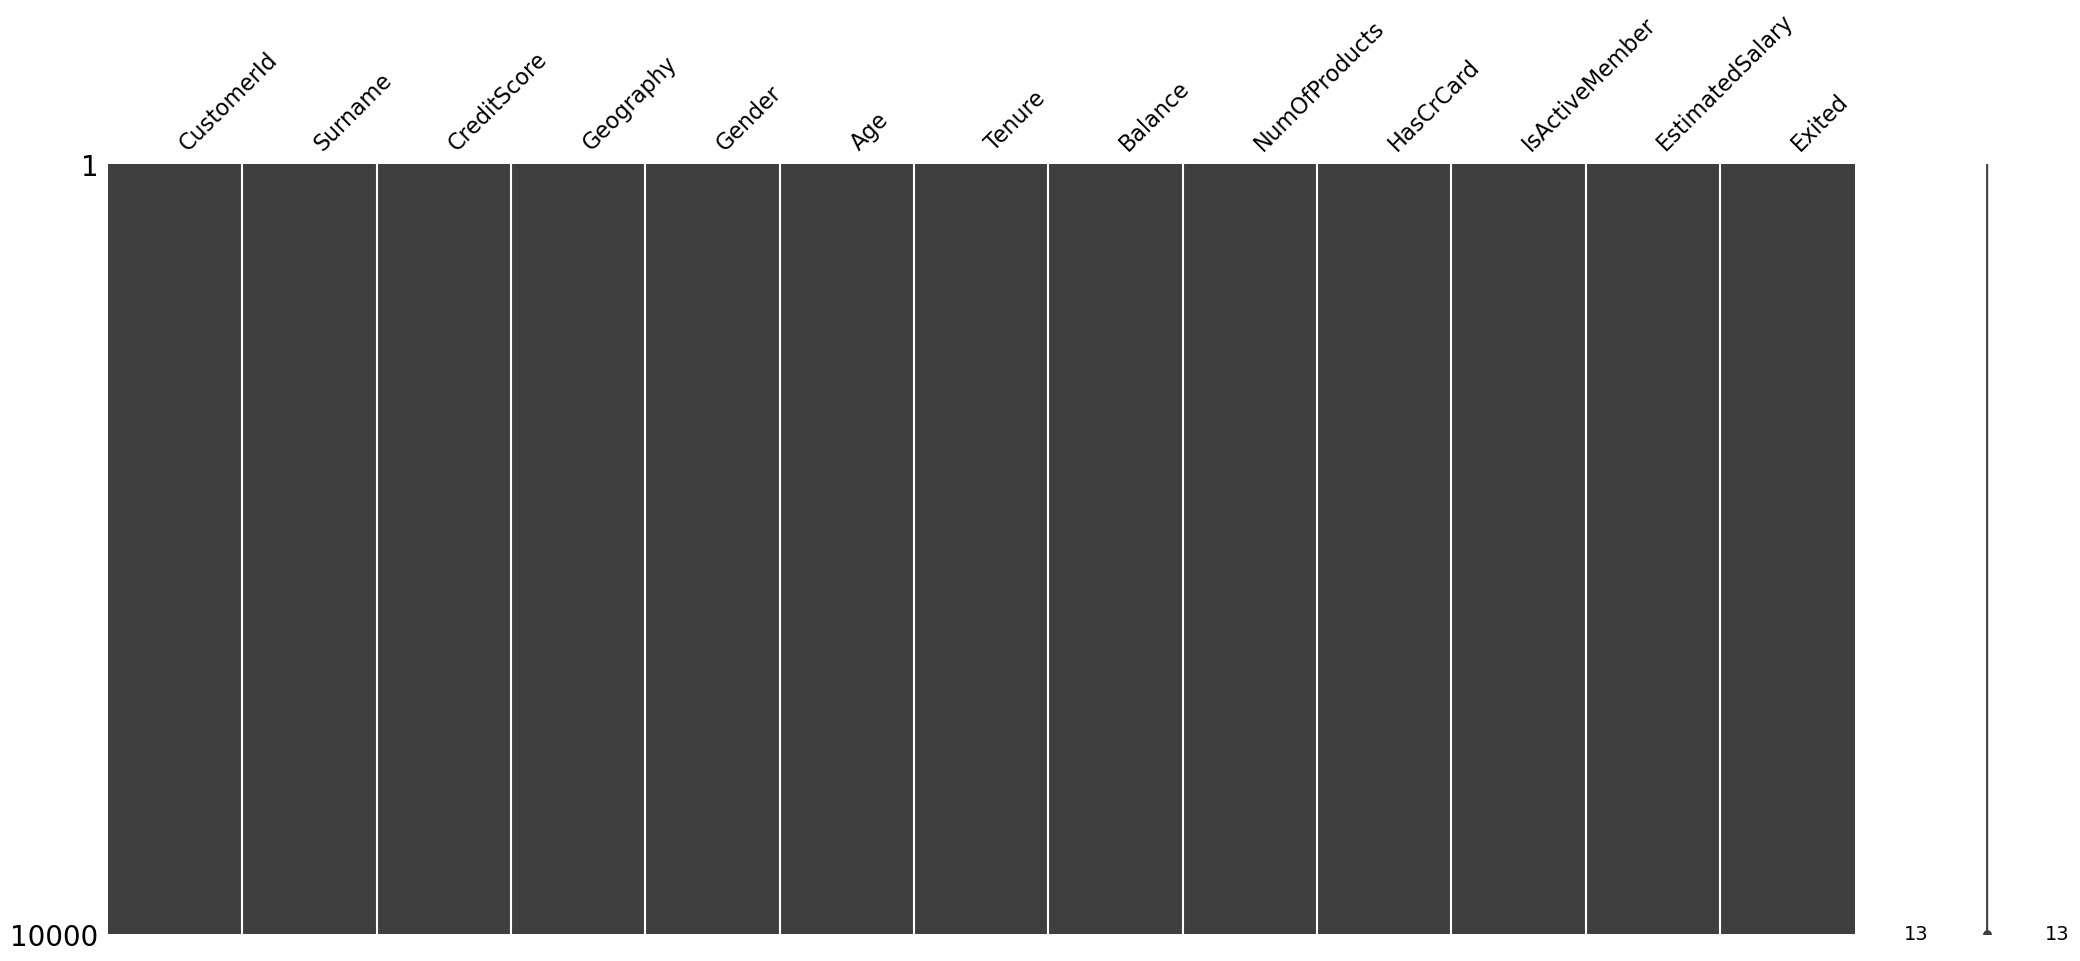

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
df.skew()

C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# Basic information about data - EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estima

In [11]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df = df.drop(['CustomerId'], axis=1 )

In [14]:
df

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

In [15]:
#Find the duplicates

df.duplicated().sum()

0

In [16]:
data = df.copy()
data

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

# Univariate analysis of the data features

Creating BoxPlots to understand their patterns for numerical data

Using boxplots to analyse the data features individualy 

Finding out the minimum and maximum value to establish the range in the boxplots for better depictions of the variability of the data feature.

Also to make the analysis more interactive and easy to understand we can also use Plotly for representation of the bargraphs, histograms and scatterplots.

In [17]:
import plotly.express as px

In [18]:
fig = px.histogram(df,x='Age',title='Age variation')

fig.show()



In [19]:
# Find the maximum value of the 'Age' column
max_age = df['Age'].max()
print(max_age)
#Find min value 
min_age = df['Age'].min()
print(min_age)

92
18


In [20]:
# Univariate analysis of the 'Age' column
# Histogram to visualize the distribution of 'Age'
plt.hist(df['Age'], bins=10,range=[10,100])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

This plot is showing that maximum customers lie in the range of 25-60 approximately.

In [21]:
# Find the maximum value of the 'CreditScore' column
max_score = df['CreditScore'].max()
print(max_score)
#Min value of the Creditscore
min_score = df['CreditScore'].min()
print(min_score)

850
350


In [22]:
fig = px.histogram(df,x='CreditScore',title='CreditScore variation')

fig.show()


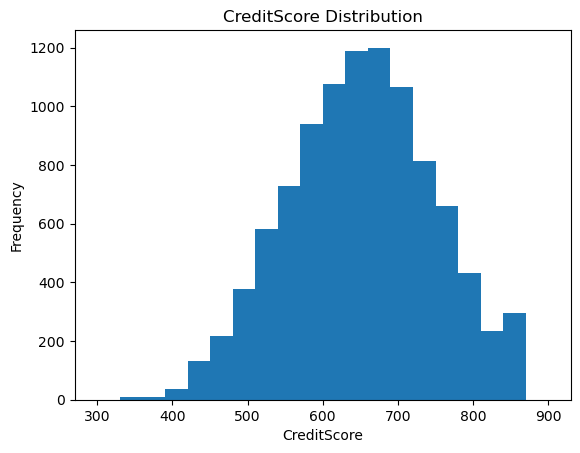

In [23]:
# Univariate analysis of the 'CreditScore' column
# Histogram to visualize the distribution of 'CreditScore'
plt.hist(df['CreditScore'], bins=20,range=[300,900])
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('CreditScore Distribution')
plt.show()

CreditScore has varied range starting from 400 till approximately 850.

In [24]:
# Univariate analysis of the 'Tenure' column
# Histogram to visualize the distribution of 'Tenure'
plt.hist(df['Tenure'], bins=15)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
plt.show()

In [25]:

fig = px.histogram(df,x='Tenure',title='Tenure variation')
fig.show()

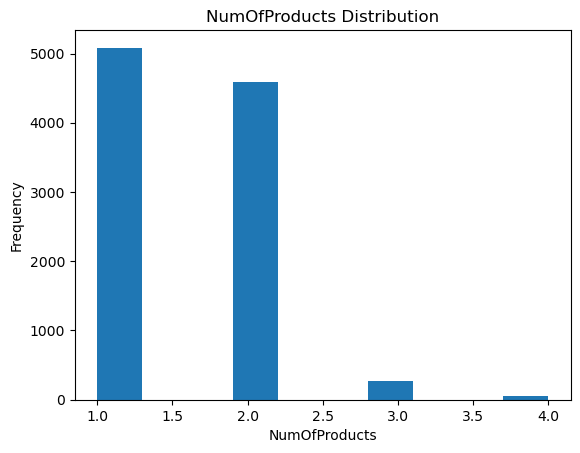

In [26]:
# Univariate analysis of the 'Noofproducts' column
# Histogram to visualize the distribution of 'Noofproducts'
plt.hist(df['NumOfProducts'],bins=10)
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.title('NumOfProducts Distribution')
plt.show()

In [27]:

fig = px.histogram(df,x='NumOfProducts',title='Tenure variation')
fig.show()

In [28]:
# Univariate analysis of the 'HasCrCard' column
# Histogram to visualize the distribution of 'HasCrCard'
plt.hist(df['HasCrCard'],range=[0,1])
plt.xlabel('HasCrCard')
plt.ylabel('Frequency')
plt.title('HasCrCard Distribution')
plt.show()

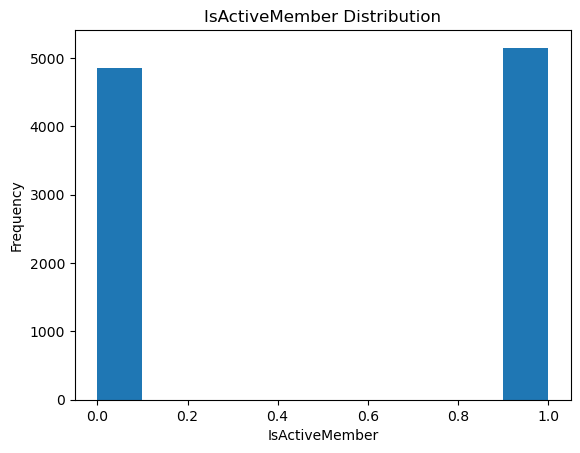

In [29]:
# Univariate analysis of the 'IsActiveMember' column
# Histogram to visualize the distribution of 'IsActiveMember'
plt.hist(df['IsActiveMember'],range=[0,1])
plt.xlabel('IsActiveMember')
plt.ylabel('Frequency')
plt.title('IsActiveMember Distribution')
plt.show()

<Axes: title={'center': 'Frequency Distribution Of Geography'}>

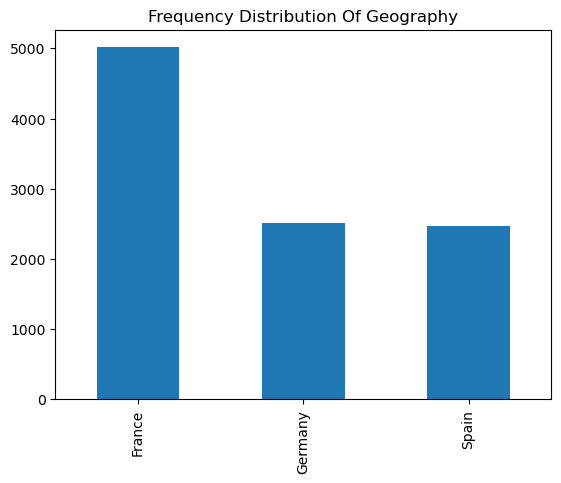

In [30]:
# Graphical representation of the geography using bar chart
df['Geography'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Geography')

<Axes: title={'center': 'Frequency Distribution Of Gender'}>

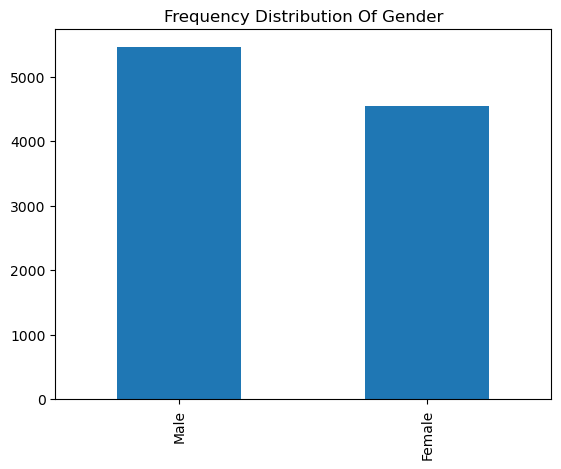

In [31]:
# Graphical representation of the gender using bar chart
df['Gender'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Gender')

In [32]:

fig = px.histogram(df,x='Surname',title='Surname variation')
fig.show()


In [33]:
fig = px.histogram(df,x='EstimatedSalary',title='Salary variation')
fig.show()


all the salary values are approximately of equal variations, we can see that all values are close enough and their is no 
large slope of rise or decline.
People we different salary values are approximately equivalent.

In [34]:
#df = df.drop(['Surname'] , axis=1)

In [35]:
df

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

# Outliers

We will try to look at the boxplotting of data features that are continouse to check for the outliers and understands its dependence

<Axes: >

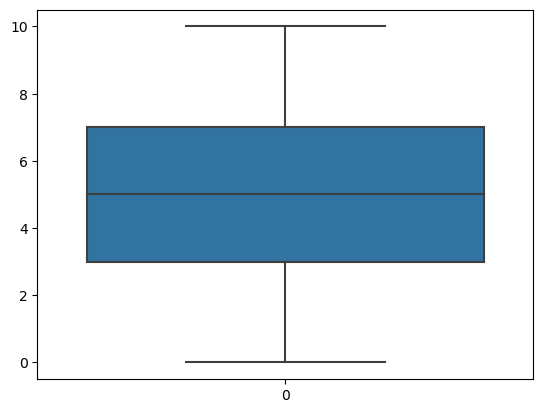

In [36]:
#Detection of outliers in tenure
sns.boxplot(df['Tenure'])

<Axes: >

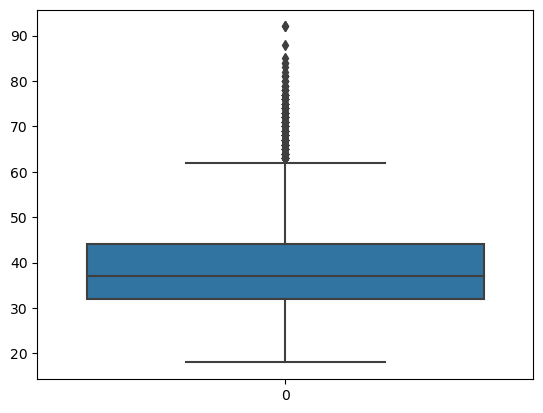

In [37]:
#Detection of outliers in Age
sns.boxplot(df['Age'])

<Axes: >

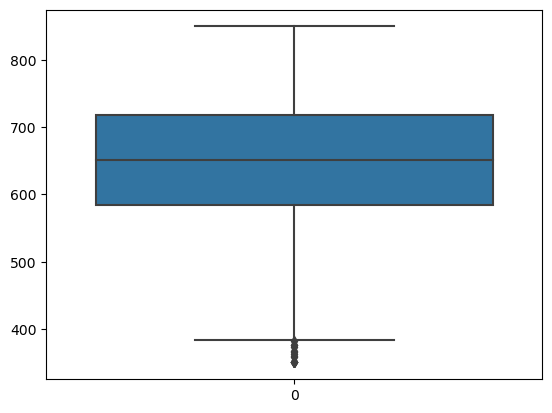

In [38]:
# Detection of outliers in credit score
sns.boxplot(df['CreditScore'])

<Axes: >

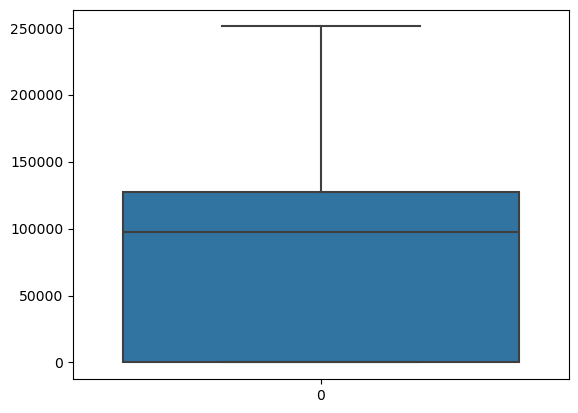

In [39]:
# Detection of outliers in credit score
sns.boxplot(df['Balance'])

# Analysis of the Target Variable - Exited

After doing the analysis of various variable by doing univariate analysis and visualising their histograms and boxplots.
We will understand the bais in the Exited Variable.

In [40]:
churn_count = df['Exited'].sum()
retained_count = df.shape[0] - churn_count
churn_ratio = churn_count/ df.shape[0]
retained_ratio = retained_count/ df.shape[0]

In [41]:
churn_ratio

0.2037

In [42]:
retained_ratio

0.7963

The bais present in the Target variable is about 80% and 20%.
Customers that churn is very less than the retained customer.

Visualize the data

To understand the distribution even better.

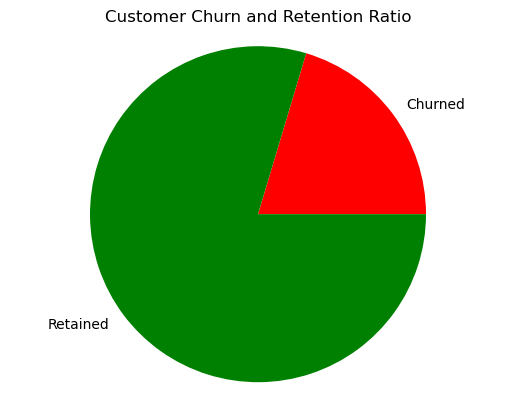

In [43]:
labels = ['Churned', 'Retained']
ratios = [churn_ratio, retained_ratio]
colors = ['red', 'green']

plt.pie(ratios, labels=labels, colors=colors)
plt.axis('equal') 
plt.title('Customer Churn and Retention Ratio')
plt.show()

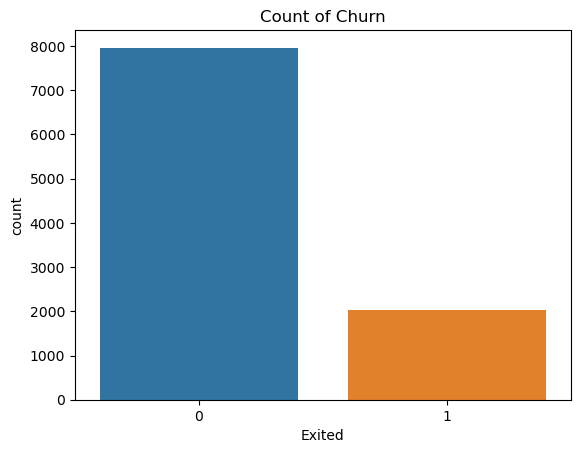

In [44]:
# plotting with target feature
sns.countplot(data=data, x='Exited')
plt.title('Count of Churn')
plt.show()

In [45]:
l1 = df.loc[df['Exited']== '1'].count()[0]
print(df.Exited.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


# 2037 of customer are left about 20.37 percentage from overall, this like an imbalance dataset

In [46]:
fig = px.histogram(df,x='Exited',title='Churned Customers variation')
fig.show()

# Bivariate analysis 
The relation between the target and the rest of the variables

In [47]:
## Graphical representation of Gender against Exited
cross_tab = pd.crosstab(df["Gender"],df["Exited"])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Gender on Exited ")
cross_tab


Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

In [48]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

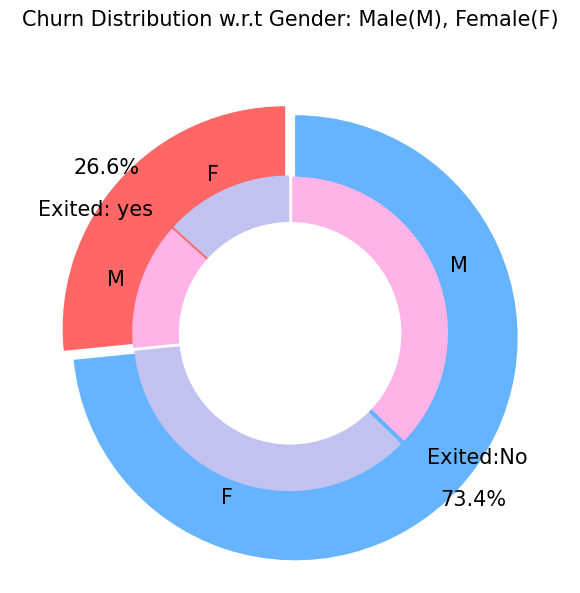

In [49]:
plt.figure(figsize=(6, 6))
labels =["Exited: yes","Exited:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [50]:
type_ = ["0", "1"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['Exited'].value_counts(), name="Exited"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424

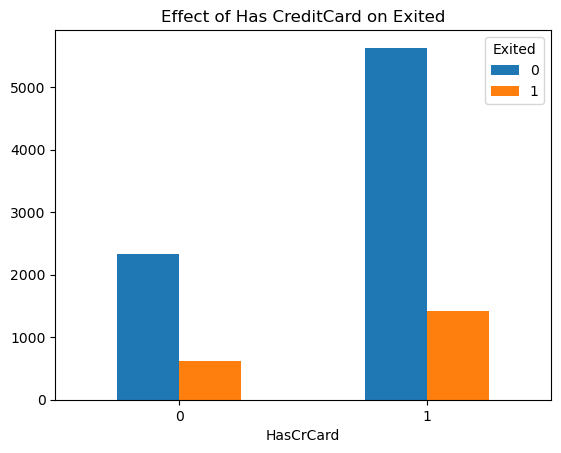

In [51]:
## Graphical representation of Creditcard against Exited
cross_tab = pd.crosstab(df['HasCrCard'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Has CreditCard on Exited")
cross_tab

In [52]:
type_ = ["0", "1"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['HasCrCard'].value_counts(), name="HasCrCard"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="HasCrCard Distributions",
    annotations=[dict(text='HasCrCard', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [53]:
fig = px.histogram(data, x="Exited", color = "HasCrCard", barmode = "group", title = "<b>Customer distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

We are able to make out from this that people who have churned and has credit card proportion can easily be understood by the graphs and we can see that people who don't have credit card are more likely to churn that people with credit Card.

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735

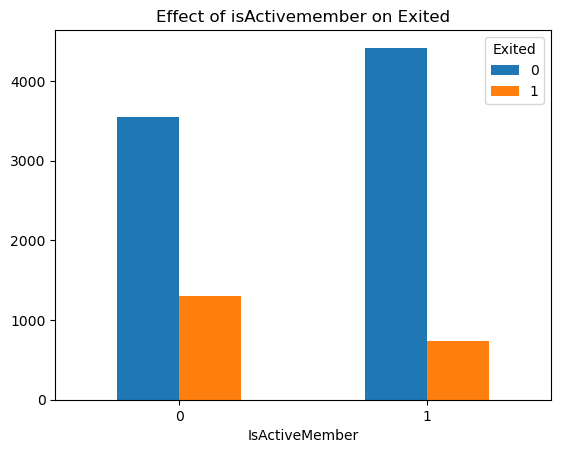

In [54]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['IsActiveMember'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of isActivemember on Exited")
cross_tab

In [55]:
type_ = ["0", "1"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['IsActiveMember'].value_counts(), name="IsActiveMember"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.7, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="IsActiveMember Distributions",
    annotations=[dict(text='IsActiveMember', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [56]:
fig = px.histogram(data, x="Exited", color = "IsActiveMember", barmode = "group", title = "<b>Customer distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

By this plot we are able to see that people who are active member of that company 

Exited            0     1
NumOfProducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60

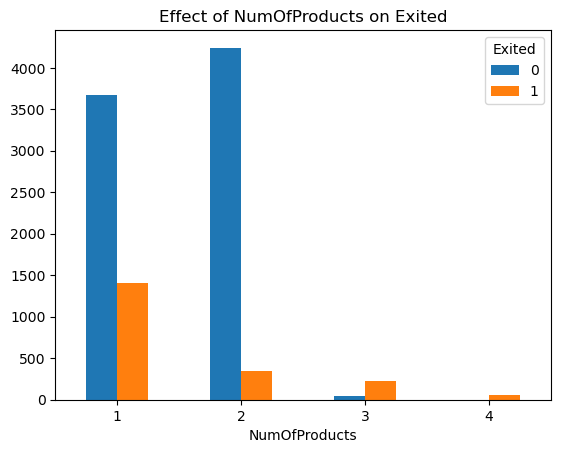

In [57]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['NumOfProducts'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of NumOfProducts on Exited")
cross_tab

In [58]:
fig = px.histogram(data, x="Exited", color = "NumOfProducts", barmode = "group", title = "<b>Customer distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [59]:
## Graphical representation of Tenure against Exited
cross_tab = pd.crosstab(df['Tenure'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Tenure on Exited")
cross_tab

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101

In [60]:
fig = px.histogram(data, x="Exited", color = "Tenure", barmode = "group", title = "<b>Customer distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [61]:
## Graphical representation of Geography against Exited


In [62]:
fig = px.histogram(data, x="Exited", color = "Geography", barmode = "group", title = "<b>Customer distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

# For Continous Data vs Discrete data

box plots

count plots

swam plots

bar plots

scatter plots

will be the best to depict the realtionships between them.


This includes [EstimatedSalary, Age, CreditScore, Surname, Balance]

In [63]:
#Depiction of CreditScore with Exited 
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.CreditScore[(df["Exited"] == 0) ],color="Red", fill = True);

ax = sns.kdeplot(df.CreditScore[(df["Exited"] == 1) ],ax =ax, color="Blue", fill= True);

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CreditScore');
ax.set_title('Distribution of CreditScore by churn');

This depiction is quite overlapping in nature, People with similar credit Score are churned and retained in the same amount.

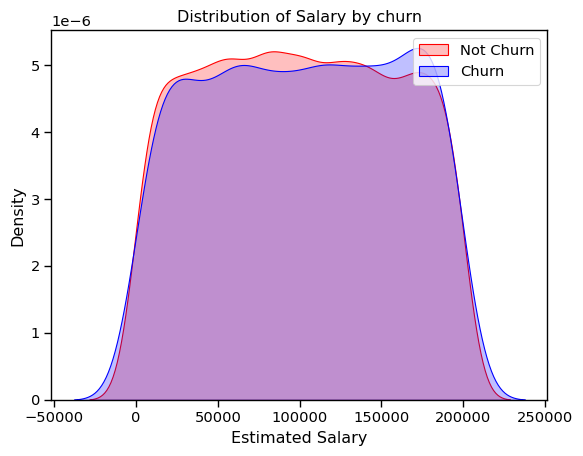

In [64]:
#Depiction of Estimated Salary with Exited 
sns.set_context("paper",font_scale=1.2)
ax = sns.kdeplot(data.EstimatedSalary[(df["Exited"] == 0) ],color="Red", fill = True);

ax = sns.kdeplot(df.EstimatedSalary[(df["Exited"] == 1) ],ax =ax, color="Blue", fill= True);

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Estimated Salary');
ax.set_title('Distribution of Salary by churn');

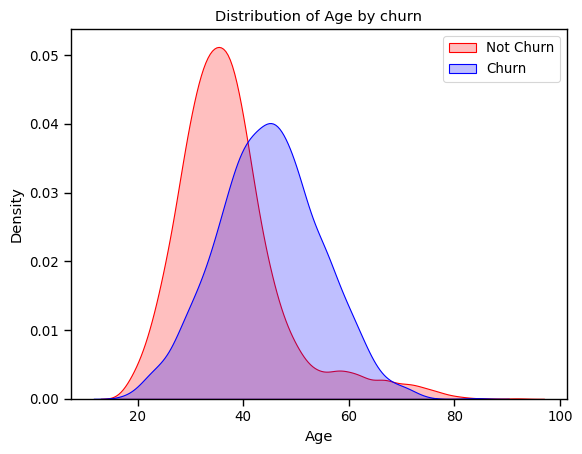

In [65]:
#Depiction of Age with Exited 
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Age[(df["Exited"] == 0) ],
                color="Red", fill = True);
ax = sns.kdeplot(df.Age[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of Age by churn');

People who churn are of of the age range 20-70 and much lesser than people who dont churn.

# People with age between 35-55 are more likely to churn than people with age 20-45 they are retained more.

# Feature Engineering

1. Handling of the missing values
		
        No missing values were present, all data preprocessing was done.

2. Lable Encoding of the Data

		Geography and Gender are categorical data that need to be encoded and converted into numerical data.

3. Feature Selection

		Selection of the features that affect the target variable more than the others and hve less bias.

In [66]:
#Converting the Categorical data into Numerical Data
from sklearn.preprocessing import LabelEncoder

# Converting categorical columns to numerical columns
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])
df['Surname'] = encoder.fit_transform(df["Surname"])

In [67]:
df.head()

Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0     1115          619          0       0   42       2       0.00   
1     1177          608          2       0   41       1   83807.86   
2     2040          502          0       0   42       8  159660.80   
3      289          699          0       0   39       1       0.00   
4     1822          850          2       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

In [68]:
#Depiction of Surname with Exited 
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Surname[(df["Exited"] == 0) ],
                color="Red", fill = True);
ax = sns.kdeplot(df.Surname[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Surname');
ax.set_title('Distribution of Surname by churn');

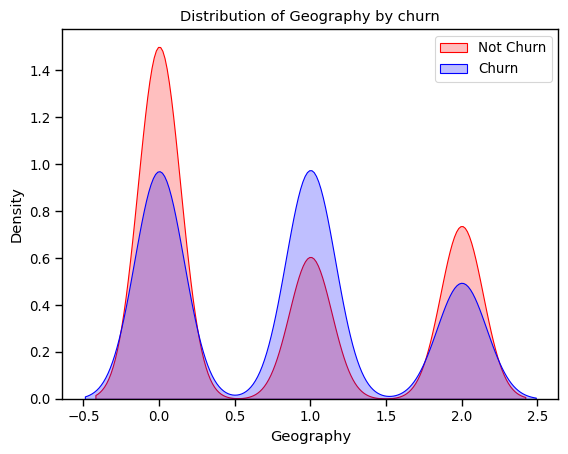

In [69]:
#Depiction of Geography with Exited 
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Geography[(df["Exited"] == 0) ],
                color="Red", fill = True);
ax = sns.kdeplot(df.Geography[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Geography');
ax.set_title('Distribution of Geography by churn');

In [70]:
#Depiction of Gender with Exited 
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Gender[(df["Exited"] == 0) ],
                color="Red", fill = True);
ax = sns.kdeplot(df.Gender[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Gender');
ax.set_title('Distribution of Gender by churn');

Here we tried to depict the relationship between the categorical data features after label encoding with exited variable.

# Get Correlation of "Exited" with other variables


In [71]:
plt.figure(figsize=(15,8))
data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\2681086695.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

# Postive correlation: 
we can see that in case of Age it is the closest to 1 as compared to other Datafeatures it means that if this variable increase, the likelihood of a customer "exiting" also increases. it has strong influence on customer churn.

# Negative Correlation : 
We can see that in the case of CreditScore, Number of products and Activemember these variables with negative correlations close to -1 would suggest that as these variables increase, the likelihood of a customer "exiting" decreases. These variables might be associated with customer retention.

# Weak Correlation: 
We can see in the case of Estimated Salary, hasCreditcard and Tenure these variables are close to 0 indicate a weak linear relationship between the variable and customer churn. This suggests that changes in these variables don't strongly impact the likelihood of a customer "exiting."


# Feature Importance
We can see that the variables with high Correlation are more likely to effect the Churn datafeature i.e. Age and balance could have an effect on exited variable
while the features that will effect the retension of the customers will be the ones with negative correlation.


C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\2448248852.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

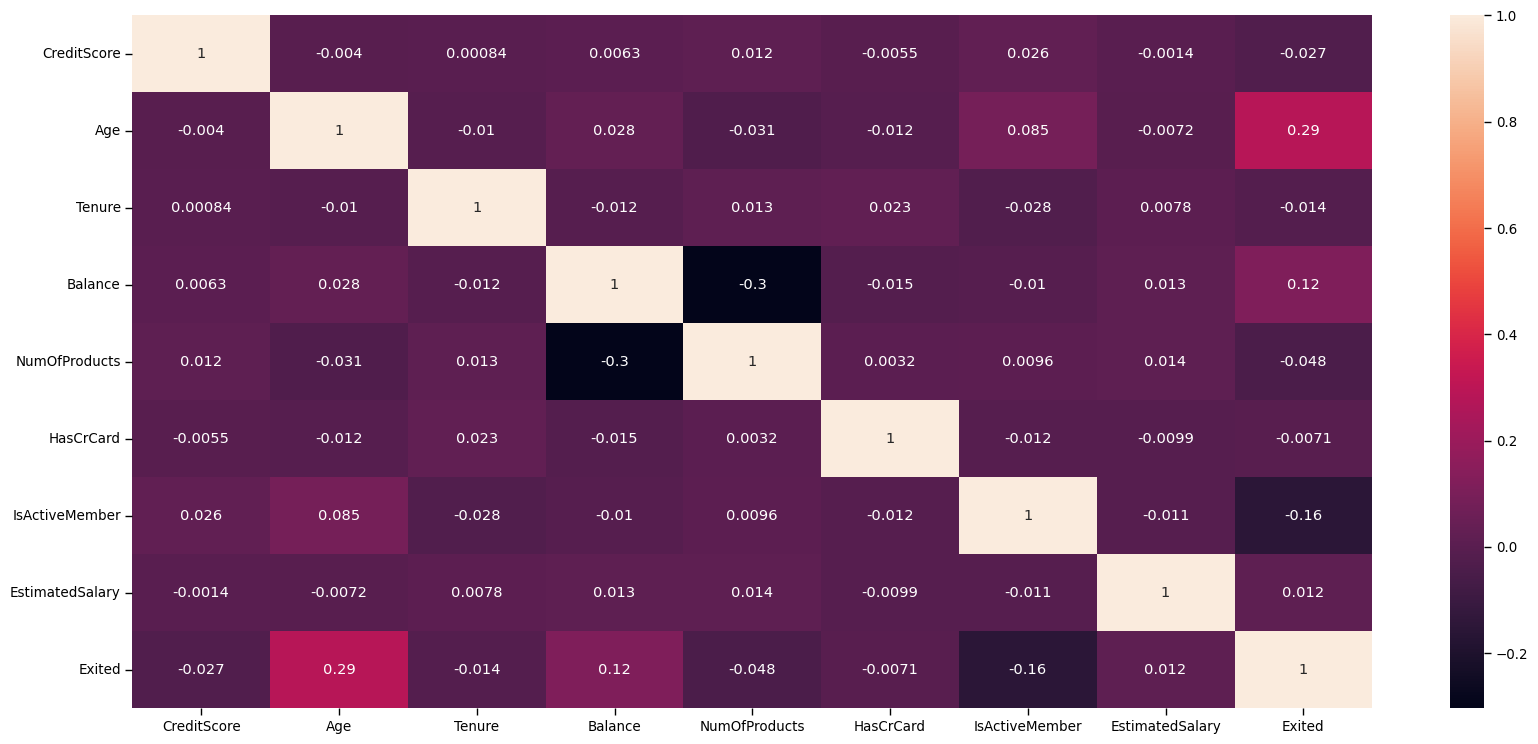

In [72]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

The red blocks show high correlation or positive correlation, which is of the dataFeature Age.
Other blocks show negative or weak Correlation.

# Splitting the data

In [73]:
# splitting dataset into dependent and independent feature
X = df.drop(columns='Exited')
y = df['Exited']

In [74]:
X.head()

Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0     1115          619          0       0   42       2       0.00   
1     1177          608          2       0   41       1   83807.86   
2     2040          502          0       0   42       8  159660.80   
3      289          699          0       0   39       1       0.00   
4     1822          850          2       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0              1          1               1        101348.88  
1              1          0               1        112542.58  
2              3          1               0        113931.57  
3              2          0               0         93826.63  
4              1          1               1         79084.10

# Feature Selection


In [75]:
# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

In [76]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

According to the feature selection, we selects the 10 out of 11 features. these are the 10 features are selected 
out of which 9 are true and one is false, i.e. HasCrCard while others are:
[Surname,CreditScore,Geography,Gender,Age,Tenure, balance,NumofProducts, IsActiveMember,EstimatedSalary]

From sklearn using feature selection modules importing the SelectKBest to select the important feature

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [78]:
X_train.shape

(7000, 10)

In [79]:
X_test.shape

(3000, 10)

In [80]:
# its an imbalance dataset
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Before moving forward,while doing bivariate analysis we were able to see that the range is different for some datafeatures thus the dataset requires standard scalling.

In [81]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distpl

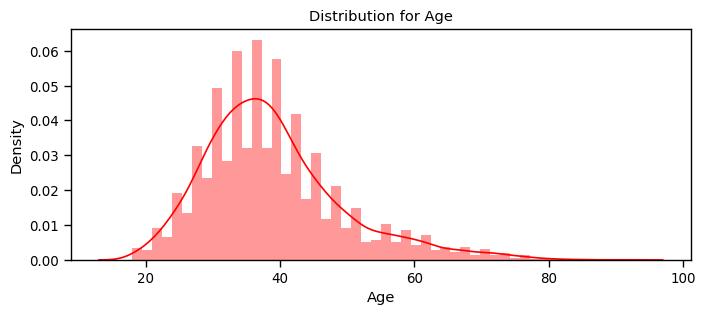

In [82]:
col =  ["CreditScore",'Age','Balance','EstimatedSalary']
for features in col :distplot(features, data)

The features need standard scaling as all of them are distributed over different range values

C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_10152\3330901477.py:4: UserWarning:



`distpl

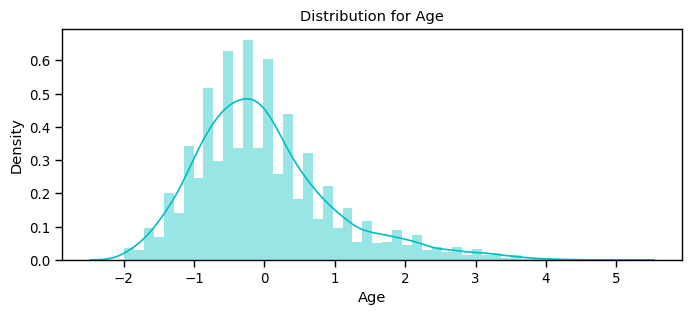

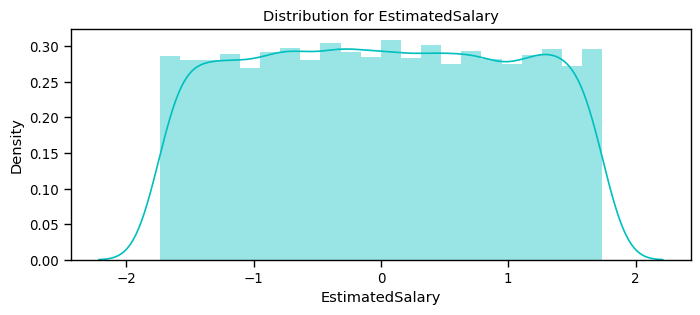

In [83]:
data_std = pd.DataFrame(StandardScaler().fit_transform(df[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [84]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [85]:
for i in df.columns:
    print(i, ": ", df[i].unique())

Surname :  [1115 1177 2040 ... 1366   44  363]
CreditScore :  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 5

In [86]:
scaler = StandardScaler()
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [87]:
!pip install xgboost

In [88]:
!pip install catboost

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [91]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))


# Evaluating Model results

In [ ]:
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10,shuffle= True,random_state=0 )
    
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    model_results.loc[i] = [name, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

In [ ]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# KNN

In [ ]:
score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

visualize the relationship between the number of neighbors (K) and a score metric (accuracy metric) for a K Nearest Neighbors (KNN) algorithm. 

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Random Forest

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    


In [ ]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

In [ ]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [ ]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)



In [ ]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")

In [ ]:
eval_ =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False).reset_index().drop(columns = "index")
eval_

# Confusion Matrix

In [ ]:
predictions = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title(j,fontsize=14)
    plt.show()

k-Fold Cross-Validation:
Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set. So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

# Model Evaluation

In [ ]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [ ]:
k_fold_cross_validation(classifier8, "Adaboost")

In [ ]:
k_fold_cross_validation(classifier, "Logistic regression")

In [ ]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

In [ ]:
k_fold_cross_validation(classifier7, "Random Forest classifier")

In [ ]:
k_fold_cross_validation(classifier6, "Decision Tree classifier")

In [ ]:
k_fold_cross_validation(classifier4, "Kernel SVM")

In [ ]:
k_fold_cross_validation(classifier3, "Knn")

In [ ]:
!pip install nbconvert